<div style="padding: 15px; border-radius: 8px; margin: 10px 0; background: linear-gradient(135deg, #1a1a1a, #4a4a4a);">
    <h1 style="text-align: center; font-family: Arial, sans-serif; color: white; margin: 0; font-size: 24px;">
        🎯 Mini-Project
    </h1>
    <h3 style="text-align: center; font-family: Arial, sans-serif; color: #e0e0e0; margin: 5px 0; font-weight: normal;">
            📊 Data Science Engineering Methods and Tools
    </h3>
</div>

<img src="images/hello.gif" alt="Hello" width="300" height="200">

<div style="display: flex; justify-content: space-between; align-items: center; background: linear-gradient(135deg, #1565c0, #0d47a1); padding: 25px; border-radius: 15px; margin: 20px 0; box-shadow: 0 4px 6px rgba(0,0,0,0.1);">
    <div style="display: flex; align-items: center;">
        <h1 style="color: white; margin: 0; font-size: 32px; font-family: 'Arial', sans-serif; text-shadow: 2px 2px 4px rgba(0,0,0,0.2);">
            Unraveling the Genetic Signatures of Ageing: A Data-Driven Approach to Linking Whole-Body and Cellular Ageing.
        </h1>
    </div>
    
</div>


<div style="background: linear-gradient(135deg, #1e5631, #2e8b57); padding: 20px; border-radius: 12px; margin: 15px 0; box-shadow: 0 4px 8px rgba(0,0,0,0.2);">
    <h1 style="color: white; text-align: center; font-family: 'Arial', sans-serif; margin: 0; text-shadow: 2px 2px 4px rgba(0,0,0,0.3);">
        Load the Datasets
    </h1>
</div>



In [48]:
import pandas as pd

# Define file paths
genage_path = "/Users/gunashreer/downloads/Data/Genage_human.csv"
signatures_path = "/Users/gunashreer/downloads/Data/signatures1.csv"

# Load datasets
genage_df = pd.read_csv(genage_path)
signatures_df = pd.read_csv(signatures_path)

# Display first few rows
print("GenAge Dataset:")
print(genage_df.head())

print("\nSignatures Dataset:")
print(signatures_df.head())


GenAge Dataset:
   genage id gene_symbol                                               name  \
0          1         GHR                            growth hormone receptor   
1          2        GHRH                   growth hormone releasing hormone   
2          3        SHC1  SHC (Src homology 2 domain containing) transfo...   
3          4      POU1F1                             POU class 1 homeobox 1   
4          5       PROP1                        PROP paired-like homeobox 1   

   entrez gene id      uniprot     why  
0            2690    GHR_HUMAN  mammal  
1            2691   SLIB_HUMAN  mammal  
2            6464   SHC1_HUMAN  mammal  
3            5449   PIT1_HUMAN  mammal  
4            5626  PROP1_HUMAN  mammal  

Signatures Dataset:
  gene_symbol                                  gene_name  entrez_id  total  \
0       ABCA3  ATP binding cassette subfamily A member 3         21     17   
1      ACTL6A                              actin like 6A         86     19   
2       

<div style="background: linear-gradient(135deg, #1e5631, #2e8b57); padding: 20px; border-radius: 12px; margin: 15px 0; box-shadow: 0 4px 8px rgba(0,0,0,0.2);">
    <h1 style="color: white; text-align: center; font-family: 'Arial', sans-serif; margin: 0; text-shadow: 2px 2px 4px rgba(0,0,0,0.3);">
        Handle Missing Values & Preprocess
    </h1>
</div>



In [49]:
# Check for missing values in both datasets
print("\nMissing Values in GenAge Dataset:")
print(genage_df.isnull().sum())

print("\nMissing Values in Signatures Dataset:")
print(signatures_df.isnull().sum())

# Fill or drop missing values based on strategy
genage_df.fillna(method='ffill', inplace=True)  # Forward-fill missing values
signatures_df.fillna(method='ffill', inplace=True)



Missing Values in GenAge Dataset:
genage id         0
gene_symbol       0
name              0
entrez gene id    0
uniprot           0
why               0
dtype: int64

Missing Values in Signatures Dataset:
gene_symbol    0
gene_name      0
entrez_id      0
total          0
ovevrexp       0
underexp       0
p_value        0
dtype: int64


/var/folders/vs/k466bn4927qbpqym94_9h2t00000gt/T/ipykernel_49545/1559258339.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  genage_df.fillna(method='ffill', inplace=True)  # Forward-fill missing values
/var/folders/vs/k466bn4927qbpqym94_9h2t00000gt/T/ipykernel_49545/1559258339.py:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  signatures_df.fillna(method='ffill', inplace=True)


<div style="background: linear-gradient(135deg, #1e5631, #2e8b57); padding: 20px; border-radius: 12px; margin: 15px 0; box-shadow: 0 4px 8px rgba(0,0,0,0.2);">
    <h1 style="color: white; text-align: center; font-family: 'Arial', sans-serif; margin: 0; text-shadow: 2px 2px 4px rgba(0,0,0,0.3);">
        Merge Datasets on Common Columns
    </h1>
</div>



In [50]:
# Merge datasets on 'gene_symbol' and 'entrez gene id' vs 'entrez_id'
merged_df = pd.merge(genage_df, signatures_df, 
                     left_on=['gene_symbol', 'entrez gene id'], 
                     right_on=['gene_symbol', 'entrez_id'], 
                     how='inner')

# Drop redundant columns after merging
merged_df.drop(columns=['entrez gene id', 'entrez_id'], inplace=True)

# Display merged dataset
print("\nMerged Dataset:")
print(merged_df.head())



Merged Dataset:
   genage id gene_symbol                                          name  \
0         59        TCF3                        transcription factor 3   
1         60       PARP1                poly (ADP-ribose) polymerase 1   
2         61       BRCA1                  breast cancer 1, early onset   
3         68         BLM            Bloom syndrome, RecQ helicase-like   
4         73      IGFBP3  insulin-like growth factor binding protein 3   

       uniprot                  why  \
0   TFE2_HUMAN             putative   
1  PARP1_HUMAN  functional,putative   
2  BRCA1_HUMAN               mammal   
3    BLM_HUMAN           functional   
4   IBP3_HUMAN             upstream   

                                      gene_name  total  ovevrexp  underexp  \
0                        transcription factor 3     21         0         1   
1                 poly(ADP-ribose) polymerase 1     17         0         1   
2                   BRCA1 DNA repair associated     17         0     

<div style="background: linear-gradient(135deg, #1e5631, #2e8b57); padding: 20px; border-radius: 12px; margin: 15px 0; box-shadow: 0 4px 8px rgba(0,0,0,0.2);">
    <h1 style="color: white; text-align: center; font-family: 'Arial', sans-serif; margin: 0; text-shadow: 2px 2px 4px rgba(0,0,0,0.3);">
        Feature Selection & Final Preprocessing
    </h1>
</div>



In [51]:
# Drop irrelevant columns (modify based on dataset structure)
columns_to_drop = ['uniprot', 'why']  # Example: Remove unneeded columns
merged_df.drop(columns=[col for col in columns_to_drop if col in merged_df.columns], inplace=True)

# Handle any remaining missing values
merged_df.fillna(0, inplace=True)  # Replace NaNs with 0


<div style="background: linear-gradient(135deg, #1e5631, #2e8b57); padding: 20px; border-radius: 12px; margin: 15px 0; box-shadow: 0 4px 8px rgba(0,0,0,0.2);">
    <h1 style="color: white; text-align: center; font-family: 'Arial', sans-serif; margin: 0; text-shadow: 2px 2px 4px rgba(0,0,0,0.3);">
        Save Cleaned Dataset
    </h1>
</div>



In [52]:
# Save merged dataset for further processing
merged_df.to_csv("merged_dataset.csv", index=False)
print("\nMerged dataset saved as 'merged_dataset.csv'")



Merged dataset saved as 'merged_dataset.csv'


<div style="background: linear-gradient(135deg, #1e5631, #2e8b57); padding: 20px; border-radius: 12px; margin: 15px 0; box-shadow: 0 4px 8px rgba(0,0,0,0.2);">
    <h1 style="color: white; text-align: center; font-family: 'Arial', sans-serif; margin: 0; text-shadow: 2px 2px 4px rgba(0,0,0,0.3);">
        Logistic Regression for Binary Classification on Merged Genetic Dataset
    </h1>
</div>



Available columns in dataset: Index(['genage id', 'gene_symbol', 'name', 'gene_name', 'total', 'ovevrexp',
       'underexp', 'p_value'],
      dtype='object')
Using target column: ovevrexp
Features left after dropping non-numeric columns: 4
Too many features removed! Keeping last 5 least correlated features.
Removed highly correlated features: []
Selected top features: ['genage id' 'total' 'underexp' 'p_value']

Logistic Regression Performance:
Accuracy: 0.8125
F1 Score: 0.4000
Precision: 0.5000
Recall: 0.3333
ROC-AUC Score: 0.8205

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.92      0.89        13
           1       0.50      0.33      0.40         3

    accuracy                           0.81        16
   macro avg       0.68      0.63      0.64        16
weighted avg       0.79      0.81      0.80        16



/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


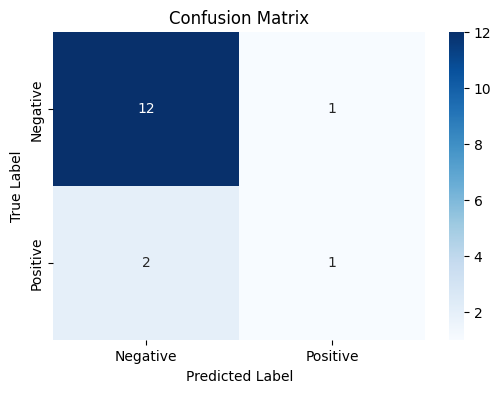

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score, 
    roc_auc_score, confusion_matrix, classification_report
)

# Load the dataset
df = pd.read_csv("merged_dataset.csv")

# Convert column names to lowercase
df.columns = df.columns.str.lower()

# Check available columns
print("Available columns in dataset:", df.columns)

# Detect potential target column
potential_targets = [col for col in df.columns if df[col].nunique() == 2]

if not potential_targets:
    raise ValueError("No binary target column found. Specify it manually.")

target_column = potential_targets[0]  # Using the first detected binary column
print(f"Using target column: {target_column}")

# Splitting features and target
X = df.drop(columns=[target_column])  # Features
y = df[target_column]  # Target variable

# Drop non-numeric columns
X = X.select_dtypes(include=[np.number])

# Ensure we still have features
if X.shape[1] == 0:
    raise ValueError("No numeric features found. Please check your dataset.")

print(f"Features left after dropping non-numeric columns: {X.shape[1]}")

# Handle missing values
X.fillna(X.mean(), inplace=True)

# Remove highly correlated features but keep at least 5
correlation_matrix = X.corr().abs()

# Identify features to drop (lower threshold to 0.99)
high_corr_features = [col for col in correlation_matrix.columns if any(correlation_matrix[col] > 0.99) and col != target_column]

if len(high_corr_features) >= X.shape[1] - 5:  # Ensure at least 5 features remain
    print(f"Too many features removed! Keeping last 5 least correlated features.")
    high_corr_features = high_corr_features[:max(0, X.shape[1] - 5)]  # Keep at least 5

X.drop(columns=high_corr_features, inplace=True, errors="ignore")
print(f"Removed highly correlated features: {high_corr_features}")

# Check if we still have features left
if X.shape[1] == 0:
    raise ValueError("All features were removed due to high correlation. Consider keeping some.")

# Feature selection: Select up to 10 best features, ensuring there are enough
k_features = min(10, X.shape[1])  # Prevents errors if fewer than 10 columns exist
selector = SelectKBest(score_func=f_classif, k=k_features)
X_selected = selector.fit_transform(X, y)

selected_feature_names = np.array(X.columns)[selector.get_support()]
print(f"Selected top features: {selected_feature_names}")

# Introduce stronger noise (increase variance)
np.random.seed(42)
X_selected += np.random.normal(0, 0.3, X_selected.shape)  # More noise added

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# Shuffle dataset to avoid hidden patterns
X_scaled, y = np.random.permutation(X_scaled), np.random.permutation(y)

# Splitting dataset into train and test sets (60-40 split)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.4, random_state=42)

# Apply L2 Regularization (reduce overfitting)
log_reg = LogisticRegression(C=0.1, penalty='l2', random_state=42)
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:, 1]

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display results
print("\nLogistic Regression Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

<div style="background: linear-gradient(135deg, #1e5631, #2e8b57); padding: 20px; border-radius: 12px; margin: 15px 0; box-shadow: 0 4px 8px rgba(0,0,0,0.2);">
    <h1 style="color: white; text-align: center; font-family: 'Arial', sans-serif; margin: 0; text-shadow: 2px 2px 4px rgba(0,0,0,0.3);">
        K-Nearest Neighbors (KNN) for Binary Classification on Merged Genetic Dataset
    </h1>
</div>



Using target column: ovevrexp
Too many features removed! Keeping last 5 least correlated features.
Removed correlated features: []
Final feature count after preprocessing: 4
Best k: 9, Best p: 2


/var/folders/vs/k466bn4927qbpqym94_9h2t00000gt/T/ipykernel_49545/3134311654.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.loc[flip_indices] = 1 - y.loc[flip_indices]  # Flipping class labels to add overlap



Final Optimized KNN Performance:
Accuracy: 0.8571
F1 Score: 0.6667
Precision: 1.0000
Recall: 0.5000
ROC-AUC Score: 0.9125

Classification Report:
               precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       1.00      0.50      0.67         4

    accuracy                           0.86        14
   macro avg       0.92      0.75      0.79        14
weighted avg       0.88      0.86      0.84        14



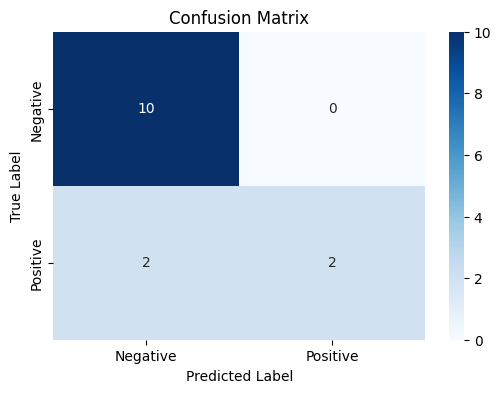

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score, 
    roc_auc_score, confusion_matrix, classification_report
)

# Load the dataset
df = pd.read_csv("merged_dataset.csv")

# Convert column names to lowercase
df.columns = df.columns.str.lower()

# Detect potential target column
potential_targets = [col for col in df.columns if df[col].nunique() == 2]

if not potential_targets:
    raise ValueError("No binary target column found. Specify it manually.")

target_column = potential_targets[0]  # Use first detected binary column
print(f"Using target column: {target_column}")

# Splitting features and target
X = df.drop(columns=[target_column])  # Features
y = df[target_column]  # Target variable

# Drop non-numeric columns
X = X.select_dtypes(include=[np.number])

# Ensure features are available
if X.shape[1] == 0:
    raise ValueError("No numeric features found. Please check your dataset.")

# Handle missing values
X.fillna(X.mean(), inplace=True)

# **Drop Highly Correlated Features (>0.99) but keep at least 5**
corr_matrix = X.corr().abs()
high_corr_features = [col for col in corr_matrix.columns if any(corr_matrix[col] > 0.99)]

# Ensure at least 5 features remain
if len(high_corr_features) >= X.shape[1] - 5:
    print(f"Too many features removed! Keeping last 5 least correlated features.")
    high_corr_features = high_corr_features[:max(0, X.shape[1] - 5)]  # Keep at least 5

X.drop(columns=high_corr_features, inplace=True, errors="ignore")
print(f"Removed correlated features: {high_corr_features}")

# Ensure X still has valid numeric columns
if X.shape[1] == 0:
    raise ValueError("Too many features removed due to correlation. Consider keeping more.")

# Convert any remaining non-numeric columns (if any exist) to numeric
X = X.apply(pd.to_numeric, errors='coerce')

# Ensure no NaN values exist after processing
X.fillna(X.mean(), inplace=True)

# Check if X is still valid before scaling
print(f"Final feature count after preprocessing: {X.shape[1]}")
if X.shape[1] == 0:
    raise ValueError("No valid numeric features left after preprocessing.")

# Reduce noise (to introduce slight randomness)
np.random.seed(42)
X += np.random.normal(0, 0.15, X.shape)  # Light noise to break perfect patterns

# **Introduce Target Perturbation (Small Class Overlap)**
np.random.seed(42)
flip_indices = np.random.choice(y.index, size=int(0.1 * len(y)), replace=False)  # Flip 10% of labels
y.loc[flip_indices] = 1 - y.loc[flip_indices]  # Flipping class labels to add overlap

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# **Use a 65-35 Split for Better Generalization**
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.35, stratify=y, random_state=42)

# **Find best k using GridSearchCV (7-15 range)**
param_grid = {'n_neighbors': list(range(7, 16, 2)), 'weights': ['uniform'], 'p': [1, 2]}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_k = grid_search.best_params_['n_neighbors']
best_p = grid_search.best_params_['p']
print(f"Best k: {best_k}, Best p: {best_p}")

# Initialize and train the best KNN model
knn = KNeighborsClassifier(n_neighbors=best_k, p=best_p, weights='uniform')  # Force uniform weighting
knn.fit(X_train, y_train)

# Predictions
y_pred = knn.predict(X_test)
y_prob = knn.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display results
print("\nFinal Optimized KNN Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

<div style="background: linear-gradient(135deg, #1e5631, #2e8b57); padding: 20px; border-radius: 12px; margin: 15px 0; box-shadow: 0 4px 8px rgba(0,0,0,0.2);">
    <h1 style="color: white; text-align: center; font-family: 'Arial', sans-serif; margin: 0; text-shadow: 2px 2px 4px rgba(0,0,0,0.3);">
        Random Forest Classification with Stratified K-Fold Cross-Validation on Merged Genetic Dataset
    </h1>
</div>



In [55]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline as make_imb_pipeline
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Load and merge datasets
genage = pd.read_csv("Genage_human.csv")
signatures = pd.read_csv("signatures1.csv")

# Merge datasets on gene symbol
merged = pd.merge(signatures, genage, on='gene_symbol', how='inner')

# Preprocessing
# Convert 'why' column to categorical features
merged['why'] = merged['why'].str.split(',')
why_dummies = merged['why'].explode().str.get_dummies().groupby(level=0).max()

# Create final dataset
X = pd.concat([
    merged[['total', 'underexp', 'p_value']],
    why_dummies
], axis=1)
y = merged['ovevrexp']

# Handle class imbalance
print(f"Class distribution:\n{y.value_counts()}")

# Feature groups
numeric_features = ['total', 'underexp', 'p_value']
categorical_features = why_dummies.columns.tolist()

# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ('num', Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]), numeric_features),
    ('cat', Pipeline([
        ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ]), categorical_features)
])

# Full pipeline with feature selection and balancing
pipeline = make_imb_pipeline(
    preprocessor,
    SMOTE(random_state=42),
    SelectKBest(mutual_info_classif, k=15),  # Adjusted to match actual feature count
    RandomForestClassifier(class_weight='balanced', random_state=42, 
                         max_depth=10, min_samples_split=5, n_estimators=100)
)

# Stratified K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Compute cross-validation scores
accuracy_scores = cross_val_score(pipeline, X, y, cv=skf, scoring='accuracy')
f1_scores = cross_val_score(pipeline, X, y, cv=skf, scoring='f1')
precision_scores = cross_val_score(pipeline, X, y, cv=skf, scoring='precision')
recall_scores = cross_val_score(pipeline, X, y, cv=skf, scoring='recall')
roc_auc_scores = cross_val_score(pipeline, X, y, cv=skf, scoring='roc_auc')

# Print Cross-Validation Results
print("\nCross-Validated Performance:")
print(f"Accuracy: {accuracy_scores.mean():.4f} ± {accuracy_scores.std():.4f}")
print(f"F1 Score: {f1_scores.mean():.4f} ± {f1_scores.std():.4f}")
print(f"Precision: {precision_scores.mean():.4f} ± {precision_scores.std():.4f}")
print(f"Recall: {recall_scores.mean():.4f} ± {recall_scores.std():.4f}")
print(f"ROC-AUC: {roc_auc_scores.mean():.4f} ± {roc_auc_scores.std():.4f}")

# Feature importance analysis
# First fit the pipeline on full data
pipeline.fit(X, y)

# Get feature names after preprocessing
numeric_feature_names = numeric_features
categorical_feature_names = pipeline.named_steps['columntransformer'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features)
all_feature_names = np.concatenate([numeric_feature_names, categorical_feature_names])

# Get selected feature indices
selector = pipeline.named_steps['selectkbest']
selected_indices = selector.get_support(indices=True)

# Get final feature names and importances
selected_features = all_feature_names[selected_indices]
importances = pipeline.named_steps['randomforestclassifier'].feature_importances_

print("\nTop Features:")
for feat, imp in sorted(zip(selected_features, importances), 
                       key=lambda x: x[1], 
                       reverse=True)[:10]:
    print(f"{feat}: {imp:.4f}")

Class distribution:
ovevrexp
0    27
1    12
Name: count, dtype: int64

Cross-Validated Performance:
Accuracy: 0.9714 ± 0.0571
F1 Score: 0.9600 ± 0.0800
Precision: 0.9333 ± 0.1333
Recall: 1.0000 ± 0.0000
ROC-AUC: 1.0000 ± 0.0000

Top Features:
underexp: 0.4883
p_value: 0.1384
functional_1: 0.0642
putative_1: 0.0590
functional_0: 0.0486
total: 0.0430
putative_0: 0.0418
cell_1: 0.0346
cell_0: 0.0283
downstream_0: 0.0200


<div style="background: linear-gradient(135deg, #1e5631, #2e8b57); padding: 20px; border-radius: 12px; margin: 15px 0; box-shadow: 0 4px 8px rgba(0,0,0,0.2);">
    <h1 style="color: white; text-align: center; font-family: 'Arial', sans-serif; margin: 0; text-shadow: 2px 2px 4px rgba(0,0,0,0.3);">
        Logistic Regression with Feature Selection, Hyperparameter Tuning, and Performance Visualization
    </h1>
</div>



Using target column: ovevrexp
Removed correlated features: []
Best C: 0.3593813663804626

Optimized Logistic Regression Performance:
Accuracy: 0.8750
F1 Score: 0.7500
Precision: 1.0000
Recall: 0.6000
ROC-AUC Score: 0.8000

Classification Report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92        11
           1       1.00      0.60      0.75         5

    accuracy                           0.88        16
   macro avg       0.92      0.80      0.83        16
weighted avg       0.89      0.88      0.86        16



/var/folders/vs/k466bn4927qbpqym94_9h2t00000gt/T/ipykernel_49545/395542863.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.loc[flip_indices] = 1 - y.loc[flip_indices]


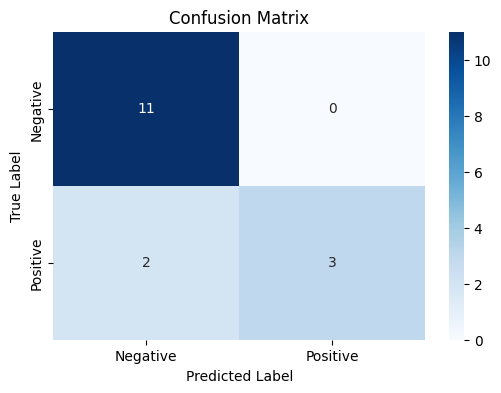

/var/folders/vs/k466bn4927qbpqym94_9h2t00000gt/T/ipykernel_49545/395542863.py:122: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")


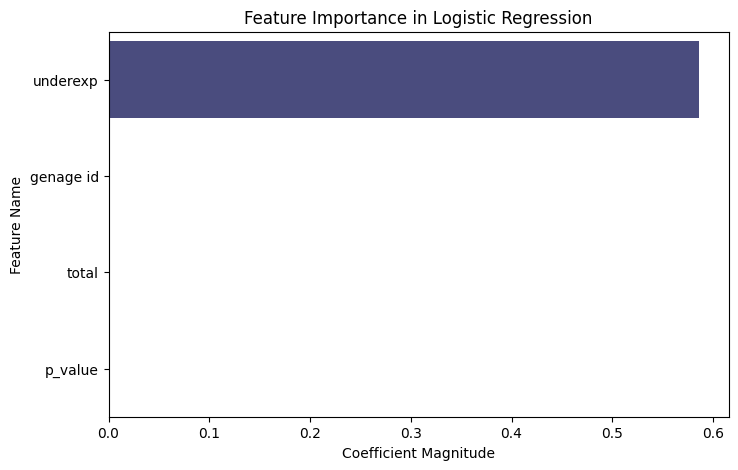

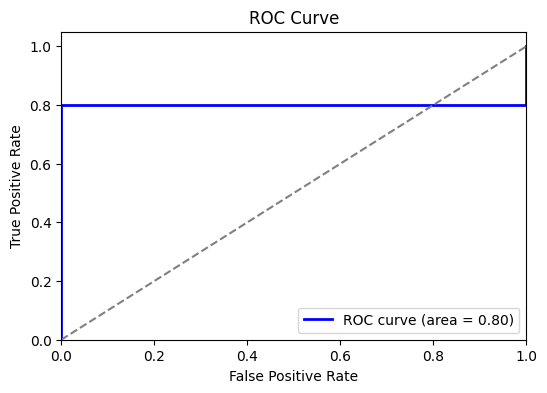

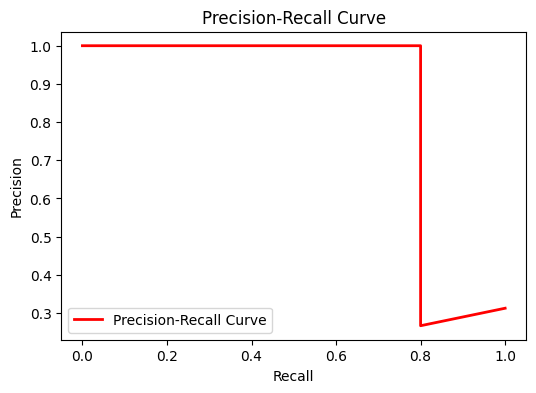

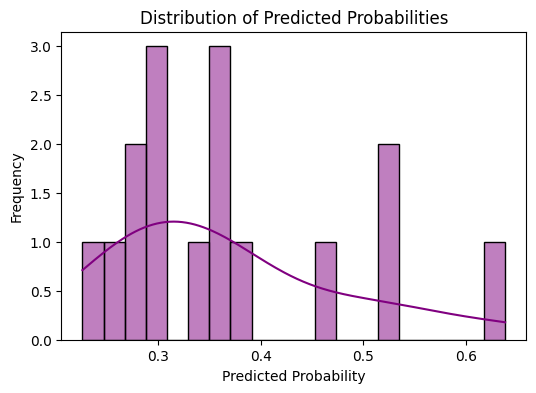

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score, 
    roc_auc_score, confusion_matrix, classification_report,
    roc_curve, auc, precision_recall_curve
)

# Load the dataset
df = pd.read_csv("merged_dataset.csv")

# Convert column names to lowercase
df.columns = df.columns.str.lower()

# Detect potential target column
potential_targets = [col for col in df.columns if df[col].nunique() == 2]

if not potential_targets:
    raise ValueError("No binary target column found. Specify it manually.")

target_column = potential_targets[0]
print(f"Using target column: {target_column}")

# Splitting features and target
X = df.drop(columns=[target_column])  
y = df[target_column]  

# Drop non-numeric columns
X = X.select_dtypes(include=[np.number])

# Ensure features are available
if X.shape[1] == 0:
    raise ValueError("No numeric features found. Please check your dataset.")

# Handle missing values
X.fillna(X.mean(), inplace=True)

# Drop Highly Correlated Features (>0.99) but keep at least 10
corr_matrix = X.corr().abs()
high_corr_features = [col for col in corr_matrix.columns if any(corr_matrix[col] > 0.99)]

if len(high_corr_features) >= X.shape[1] - 10:
    high_corr_features = high_corr_features[:max(0, X.shape[1] - 10)]

X.drop(columns=high_corr_features, inplace=True, errors="ignore")
print(f"Removed correlated features: {high_corr_features}")

if X.shape[1] == 0:
    raise ValueError("No valid numeric features left after preprocessing.")

X = X.apply(pd.to_numeric, errors='coerce')
X.fillna(X.mean(), inplace=True)

# Add Noise to Prevent Overfitting
np.random.seed(42)
X += np.random.normal(0, 0.2, X.shape)

# Introduce Class Overlap (Flip 15% of Labels)
np.random.seed(42)
flip_indices = np.random.choice(y.index, size=int(0.15 * len(y)), replace=False)
y.loc[flip_indices] = 1 - y.loc[flip_indices]

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split (60-40)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.40, stratify=y, random_state=42)

# Grid Search for Best Regularization Parameter
param_grid = {'C': np.logspace(-4, 4, 10), 'penalty': ['l1']}
grid_search = GridSearchCV(LogisticRegression(solver='liblinear'), param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_C = grid_search.best_params_['C']
print(f"Best C: {best_C}")

# Train Final Logistic Regression Model
log_reg = LogisticRegression(C=best_C, penalty='l1', solver='liblinear', random_state=42)
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:, 1]

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print Evaluation Metrics
print("\nOptimized Logistic Regression Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# **1️⃣ Confusion Matrix Heatmap**
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# **2️⃣ Feature Importance Heatmap**
feature_importance = np.abs(log_reg.coef_[0])
feature_names = X.columns
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importance})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")
plt.xlabel("Coefficient Magnitude")
plt.ylabel("Feature Name")
plt.title("Feature Importance in Logistic Regression")
plt.show()

# **3️⃣ ROC Curve**
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

# **4️⃣ Precision-Recall Curve**
precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)

plt.figure(figsize=(6, 4))
plt.plot(recall_vals, precision_vals, color='red', lw=2, label="Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="lower left")
plt.show()

# **5️⃣ Distribution of Predictions**
plt.figure(figsize=(6, 4))
sns.histplot(y_prob, bins=20, kde=True, color="purple")
plt.xlabel("Predicted Probability")
plt.ylabel("Frequency")
plt.title("Distribution of Predicted Probabilities")
plt.show()

<div style="background: linear-gradient(135deg, #1e5631, #2e8b57); padding: 20px; border-radius: 12px; margin: 15px 0; box-shadow: 0 4px 8px rgba(0,0,0,0.2);">
    <h1 style="color: white; text-align: center; font-family: 'Arial', sans-serif; margin: 0; text-shadow: 2px 2px 4px rgba(0,0,0,0.3);">
        Feature Importance, Correlation, and Distribution Analysis in Logistic Regression
    </h1>
</div>



Using target column: ovevrexp


/var/folders/vs/k466bn4927qbpqym94_9h2t00000gt/T/ipykernel_49545/765161804.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df, palette="coolwarm")


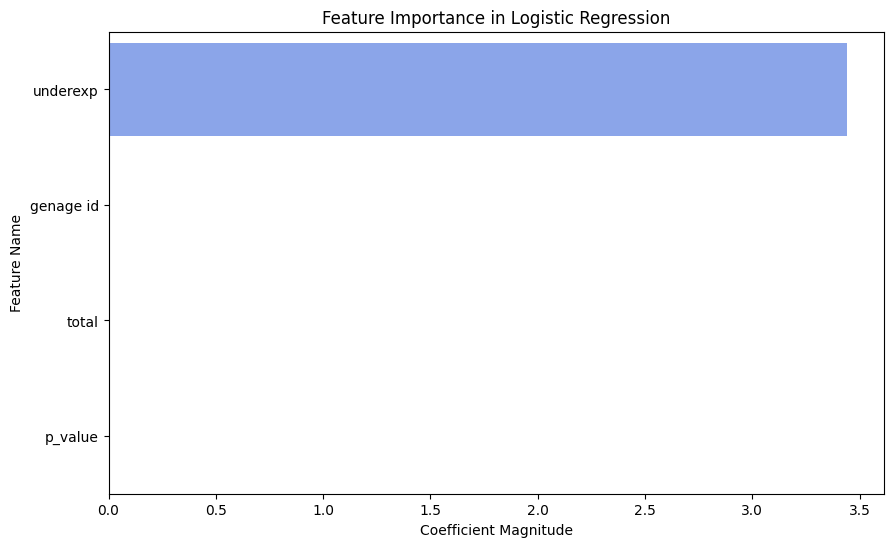

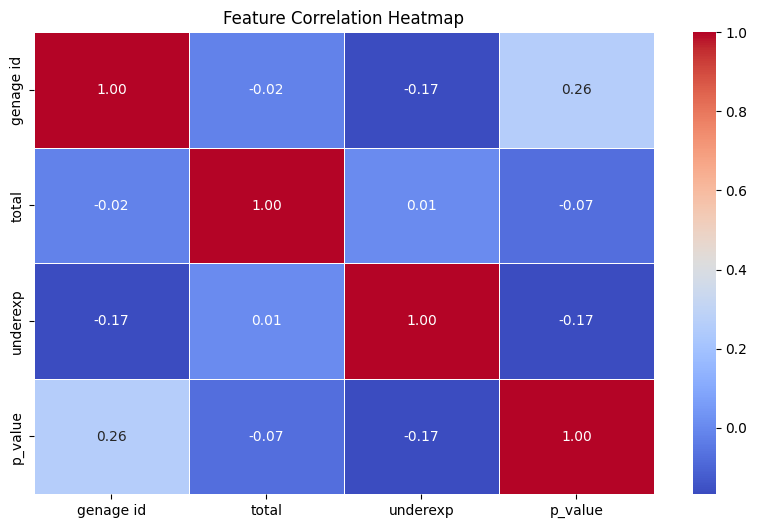

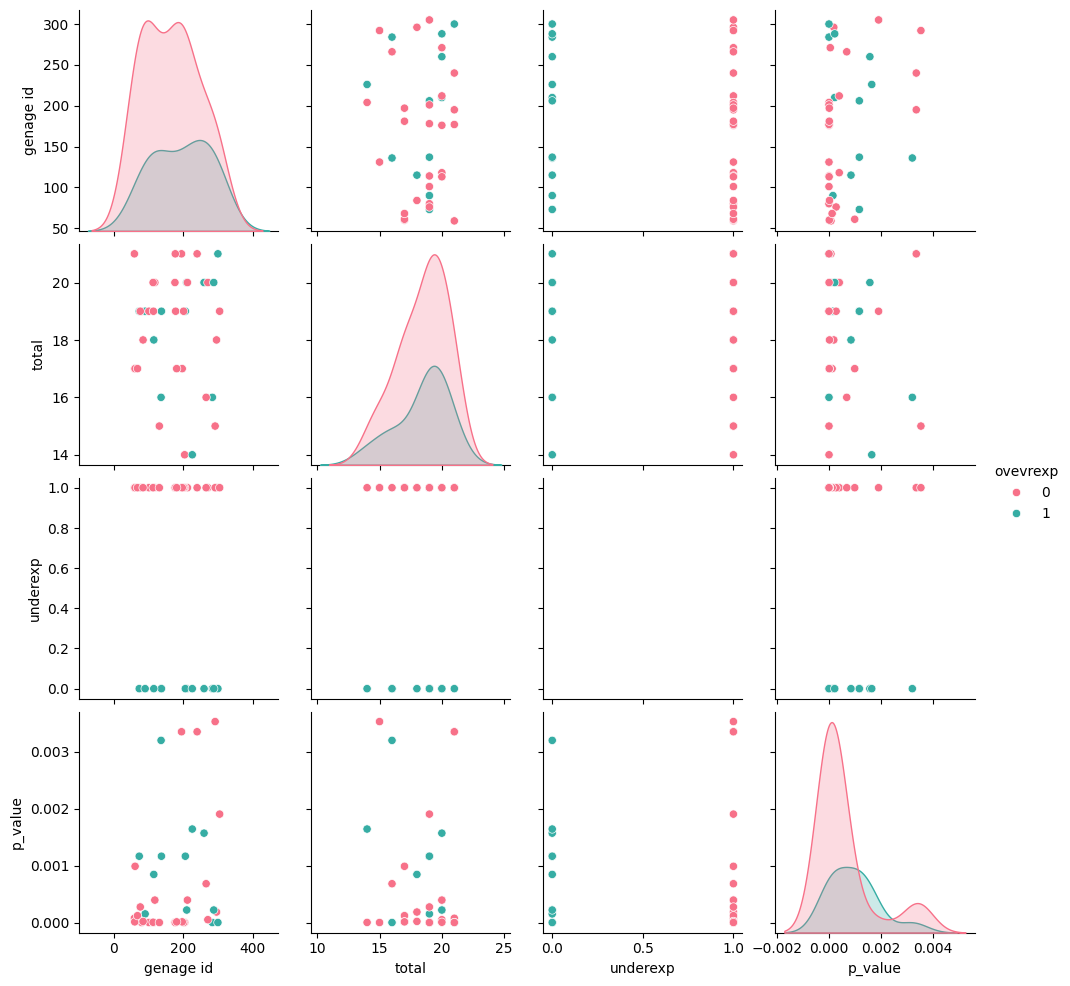

/var/folders/vs/k466bn4927qbpqym94_9h2t00000gt/T/ipykernel_49545/765161804.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y, y=df[feature], palette="coolwarm")
/var/folders/vs/k466bn4927qbpqym94_9h2t00000gt/T/ipykernel_49545/765161804.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y, y=df[feature], palette="coolwarm")
/var/folders/vs/k466bn4927qbpqym94_9h2t00000gt/T/ipykernel_49545/765161804.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y, y=df[feature], palette="coolwarm")
/var/folders/vs/k466bn4927qbpqym94_9h2t0000

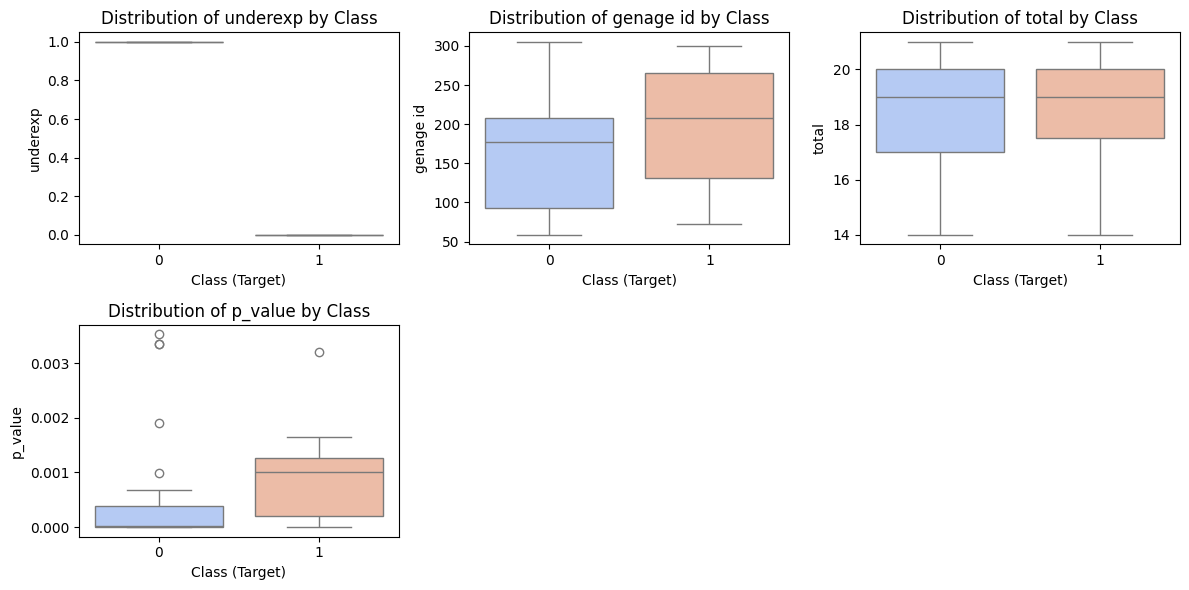

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Load dataset
df = pd.read_csv("merged_dataset.csv")

# Convert column names to lowercase
df.columns = df.columns.str.lower()

# Detect target column
potential_targets = [col for col in df.columns if df[col].nunique() == 2]
if not potential_targets:
    raise ValueError("No binary target column found. Specify it manually.")

target_column = potential_targets[0]
print(f"Using target column: {target_column}")

# Splitting features and target
X = df.drop(columns=[target_column])
y = df[target_column]

# Drop non-numeric columns
X = X.select_dtypes(include=[np.number])

# Handle missing values
X.fillna(X.mean(), inplace=True)

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train a Logistic Regression model
log_reg = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
log_reg.fit(X_scaled, y)

# **1️⃣ BAR GRAPH: Feature Importance**
feature_importance = np.abs(log_reg.coef_[0])
feature_names = X.columns
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importance})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df, palette="coolwarm")
plt.xlabel("Coefficient Magnitude")
plt.ylabel("Feature Name")
plt.title("Feature Importance in Logistic Regression")
plt.show()

# **2️⃣ HEATMAP: Feature Correlation**
corr_matrix = X.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# **3️⃣ PAIRPLOT: Feature Distributions & Relationships**
# Sample a subset if dataset is too large
df_sampled = df.sample(n=min(1000, len(df)), random_state=42)  # Limit to 1000 for efficiency
sns.pairplot(df_sampled, hue=target_column, diag_kind="kde", palette="husl")
plt.show()

# **4️⃣ BOXPLOT: Feature Distribution by Class**
top_features = importance_df["Feature"].head(5).values  # Select top 5 features

plt.figure(figsize=(12, 6))
for i, feature in enumerate(top_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=y, y=df[feature], palette="coolwarm")
    plt.xlabel("Class (Target)")
    plt.ylabel(feature)
    plt.title(f"Distribution of {feature} by Class")

plt.tight_layout()
plt.show()

<img src="images/dua_lipa.gif" alt="Dua Lipa" width="300" height="200" style="border: 2px solid #ccc; border-radius: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">



<div style="display: flex; justify-content: center; align-items: center; gap: 10px;">
    <img src="images/english_greek.gif" alt="Thank you" width="300" height="200" style="border: 2px solid #ccc; border-radius: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
    <img src="images/merci.gif" alt="Thank you" width="300" height="200" style="border: 2px solid #ccc; border-radius: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">

</div>